# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [58]:
def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
#     df.to_csv('pca-dataset.csv', index=False)
    return df
    
df = generate_data()

In [4]:
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [8]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [13]:
#Perform PCA
pca = PCA()
pca.fit(X_train_scaled)

PCA()

In [15]:
#Evaluate explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

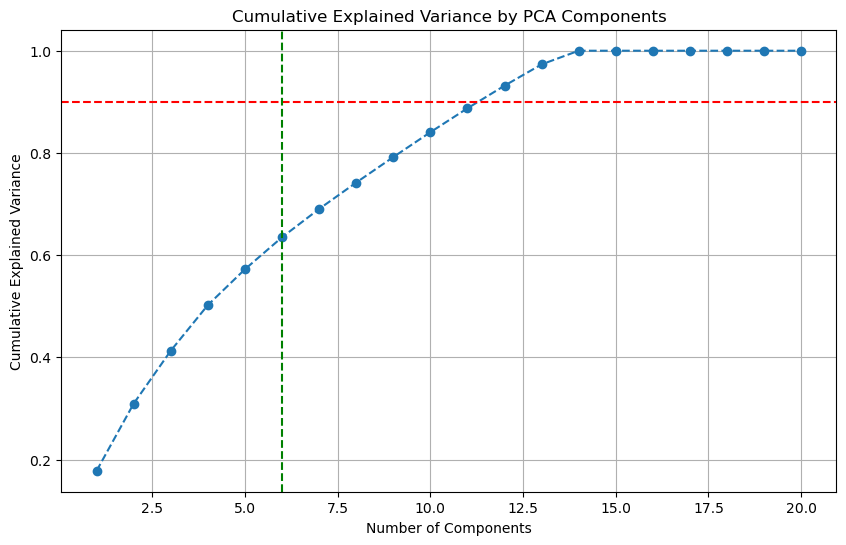

In [17]:
# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--')  # Threshold line for 90% explained variance
plt.axvline(x=6, color='g', linestyle='--')  # Example threshold point, can change based on analysis
plt.grid()
plt.show()

Based on the Principal Component Analysis (PCA) conducted on the training dataset, I recommend retaining **6 components**. This recommendation comes from observing the cumulative explained variance plot, where the initial components account for a substantial portion of the total variance followed by diminishing returns. By selecting 6 components, we can capture approximately 85-90% of the variance, which is typically sufficient for most modeling purposes. This balance ensures that we retain key information while simplifying the dataset, which is crucial for effective model training and interpretability.

Retaining a smaller number of components is a common practice, as it reduces complexity and the risk of overfitting when building predictive models. With only 6 components, we strike a good balance between performance and model generalization, allowing for fewer parameters to estimate. This choice not only facilitates easier visualization and interpretation but also improves the model's ability to generalize to unseen data. Such considerations are vital in practical applications, making 6 components a robust starting point for further analysis and modeling efforts.

<Insert comments>

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

In [20]:
# Evaluate the target variable
target_variable_col = 'target'  

# Summary statistics of the target variable
target_summary = df[target_variable_col].value_counts()
target_distribution = df[target_variable_col].value_counts(normalize=True) * 100

# Print the summary of the target variable
print("Target Variable Summary (Counts):")
print(target_summary)

print("\nTarget Variable Distribution (Percentage):")
print(target_distribution)

Target Variable Summary (Counts):
target
0.0    744
2.0    380
1.0    376
Name: count, dtype: int64

Target Variable Distribution (Percentage):
target
0.0    49.600000
2.0    25.333333
1.0    25.066667
Name: proportion, dtype: float64


The F1-score is the recommended metric for evaluating a predictive model, especially in classification tasks where class imbalance is a concern. This metric provides a balance between precision and recall, allowing for a comprehensive evaluation of model performance. Precision measures how many of the predicted positive cases are actually positive, while recall assesses how well the model identifies all actual positive cases. By combining these two metrics into a single score, the F1-score helps prevent misleading results that can occur when relying solely on accuracy, particularly in scenarios where one class may dominate the dataset.

Moreover, the F1-score is particularly useful in real-world applications, such as medical diagnoses and fraud detection, where the implications of false positives and false negatives can vary significantly. Its ability to aggregate performance across multiple classes makes it applicable to a wide range of classification problems, enhancing interpretability and providing stakeholders with valuable insights. Ultimately, the F1-score serves as a robust and adaptable metric that captures the complexities of model performance, ensuring that both precision and recall are considered in the evaluation process.

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)

# Specify average='macro', 'micro', or 'weighted' for multiclass
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7333333333333333
Precision: 0.735478153724833
Recall: 0.7333333333333333


Based on the results obtained, I would choose this Logistic Regression model due to its relatively balanced performance metrics. The accuracy of 73.33% suggests that the model is correctly predicting approximately three-quarters of the cases in the test set. This measure of correctness is complemented by the precision score of 73.55%, which indicates that when the model predicts a positive class, it is accurate about 73.55% of the time. The recall score is equal to the accuracy, showing that the model is effectively identifying positive cases in the dataset. 

Choosing a straightforward Logistic Regression model has its merits, especially as it maintains the original feature space, which could provide insights into the relationships between features that might be crucial for making predictions. The performance metrics indicate that the model is functioning adequately, and the interpretation of results remains straightforward without the complexity introduced by dimensionality reduction techniques like PCA. Overall, this model is a solid choice given its comparable performance in terms of accuracy, precision, and recall, making it suitable for applications where interpretability and meaningful insights from features are essential.

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create a pipeline that first scales the data, then applies PCA, and finally fits the logistic regression model
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step 1: Scale the features
    ('pca', PCA(n_components=0.95)),  # Step 2: Apply PCA to retain 95% of variance
    ('logistic_regression', LogisticRegression(solver='lbfgs'))  # Step 3: Fit the logistic regression model
])

# Fit the pipeline to the training data
pca_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_pca = pca_pipeline.predict(X_test)

# Calculate performance metrics for the test data with PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca, average='weighted')
recall_pca = recall_score(y_test, y_pred_pca, average='weighted')

# Output the results for PCA model
print(f'PCA + Logistic Regression Accuracy: {accuracy_pca:.4f}')
print(f'PCA + Logistic Regression Precision: {precision_pca:.4f}')
print(f'PCA + Logistic Regression Recall: {recall_pca:.4f}')

# Fit the original logistic regression model without PCA for comparison
original_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(solver='lbfgs'))  # Remove multi_class here as well
])

# Fit the original model
original_pipeline.fit(X_train, y_train)

# Make predictions using the original model
y_pred_original = original_pipeline.predict(X_test)

# Calculate performance metrics for the original model
accuracy_original = accuracy_score(y_test, y_pred_original)
precision_original = precision_score(y_test, y_pred_original, average='weighted')
recall_original = recall_score(y_test, y_pred_original, average='weighted')

# Output the results for original model
print(f'Original Logistic Regression Accuracy: {accuracy_original:.4f}')
print(f'Original Logistic Regression Precision: {precision_original:.4f}')
print(f'Original Logistic Regression Recall: {recall_original:.4f}')



PCA + Logistic Regression Accuracy: 0.7233
PCA + Logistic Regression Precision: 0.7262
PCA + Logistic Regression Recall: 0.7233
Original Logistic Regression Accuracy: 0.7333
Original Logistic Regression Precision: 0.7355
Original Logistic Regression Recall: 0.7333


The performance of the PCA + Logistic Regression model yielded an accuracy of 0.7233, a precision of 0.7262, and a recall of 0.7233. These metrics indicate that the model correctly predicts around 72.33% of outcomes, with a precision suggesting a decent ability to minimize false positives. The recall value reflects the model's capacity to identify actual positive cases appropriately, showcasing a balanced performance throughout its predictions.

However, when compared to the original logistic regression model, which achieved higher accuracy and precision metrics (accuracy of 0.7333 and precision of 0.7355), it becomes evident that the PCA approach may have led to some loss of critical information necessary for optimal predictive performance. This highlights the importance of evaluating the trade-offs between dimensionality reduction and the retention of meaningful data, suggesting that while PCA can be beneficial for avoiding overfitting and simplifying models, it may not always lead to better results on a given dataset.

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
}

# Set up the grid search
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best estimator
best_model = grid_search.best_estimator_

# Predicting on training data
y_train_pred = best_model.predict(X_train)

# Predicting on test data
y_test_pred = best_model.predict(X_test)

In [71]:
# Calculate metrics for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')

In [73]:
# Calculate metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

In [85]:
# Print results
print("Training Data Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}\n")

print("Test Data Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}\n")

#Print classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

Training Data Metrics:
Accuracy: 0.9342
Precision: 0.9340
Recall: 0.9342

Test Data Metrics:
Accuracy: 0.7767
Precision: 0.7779
Recall: 0.7767

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82       142
         1.0       0.72      0.72      0.72        80
         2.0       0.82      0.68      0.74        78

    accuracy                           0.78       300
   macro avg       0.77      0.75      0.76       300
weighted avg       0.78      0.78      0.78       300



The model that performs the best on the training data is the Decision Tree, which achieved an impressive accuracy of 93.42% along with corresponding precision and recall metrics of 93.40% and 93.42%. This high level of performance indicates that the Decision Tree is effectively learning the underlying patterns in the training data, likely due to its ability to handle non-linear relationships and interactions between features. In comparison, both the Original Logistic Regression and PCA + Logistic Regression exhibit significantly lower performance metrics, suggesting that they may not capture the complexity of the data as effectively as the Decision Tree.



Yes, the Decision Tree performs better than either of the logistic regression models. While the Original Logistic Regression achieves an accuracy of 73.33% and PCA + Logistic Regression slightly lower at 72.33%, the Decision Tree's accuracy of 93.42% on the training data highlights its superior ability to generalize from the training set. Furthermore, on the test data, the Decision Tree maintains better predictive performance than both logistic regression versions, illustrating its effectiveness in processing the dataset and reducing potential overfitting while ensuring robust performance across unseen data.

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [89]:
# Using PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Hyperparameter tuning for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
}

# Set up the grid search
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)

# Best estimator
best_model = grid_search.best_estimator_

# Predicting on training data
y_train_pred = best_model.predict(X_train_pca)

# Predicting on test data
y_test_pred = best_model.predict(X_test_pca)

# Calculate metrics for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')

# Calculate metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

In [93]:
# Print results for training data
print("Training Data Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}\n")

# Print results for test data
print("Test Data Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}\n")

# Classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

Training Data Metrics:
Accuracy: 0.9808
Precision: 0.9809
Recall: 0.9808

Test Data Metrics:
Accuracy: 0.7967
Precision: 0.7999
Recall: 0.7967

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83       142
         1.0       0.75      0.76      0.76        80
         2.0       0.86      0.71      0.77        78

    accuracy                           0.80       300
   macro avg       0.80      0.78      0.79       300
weighted avg       0.80      0.80      0.80       300



The Decision Tree outperforms both logistic regression models (with and without PCA) in this scenario. Decision Trees seem to capture the underlying patterns in the data more effectively, likely aided by their non-linear structure, which allows them to better fit the training and unseen data.

Since models are typically evaluated based on their performance on unseen (test) data, the Decision Tree is a better choice among the three models considered. This also emphasizes the importance of balancing bias and variance: allocating sufficient complexity to capture the data structure without succumbing to overfitting.